Final Project Team 1

Members

> Aileen Monserrat García Apolinar 1964960

> Karla Fernanda Barragan Ibarra 1946570

> Emir Núñez Molano 2077520

In [ ]:
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_dataset_path = '/content/drive/MyDrive/PIA IA/Eye_diseases'

In [ ]:
target_width = 100
target_height = 100

In [ ]:
# Iterate through each subfolder (class) in the main dataset directory
for class_folder in os.listdir(main_dataset_path):
    class_folder_path = os.path.join(main_dataset_path, class_folder)

    # Check if the item in the main directory is a folder
    if os.path.isdir(class_folder_path):
        print(f"Processing images in: {class_folder}")

        # Iterate through each image in the subfolder
        for filename in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, filename)

            # Check if the file is an image (e.g., JPEG)
            if img_path.endswith('.jpg') or img_path.endswith('.jpeg') or img_path.endswith('.png'):
                # Open the image using PIL
                img = Image.open(img_path)

                # Resize the image to the desired dimensions using LANCZOS filter
                resized_img = img.resize((target_width, target_height), Image.LANCZOS)

                # Save the resized image, overwrite the original
                resized_img.save(img_path)

print("Image resizing completed.")

Processing images in: Bulging_Eyes
Processing images in: Cataracts
Processing images in: Uveitis
Processing images in: Eye_diseases
Processing images in: Crossed_Eyes
Processing images in: Glaucoma
Image resizing completed.


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
# Nombres de los datasets
train_dir = './training_dataset'
test_dir = './test_dataset'

In [ ]:
test_size = 0.2

In [ ]:
# Lists to hold file paths
train_files = []
test_files = []

In [ ]:
# Iterate through each subfolder (class) in the main dataset directory
for class_folder in os.listdir(main_dataset_path):
    class_folder_path = os.path.join(main_dataset_path, class_folder)

    # Check if the item in the main directory is a folder
    if os.path.isdir(class_folder_path):
        print(f"Processing images in: {class_folder}")

        # Lists to hold file paths for this class
        train_files = []
        test_files = []

        # Iterate through each image in the subfolder
        for folder in os.listdir(class_folder_path):
            subfolder_path = os.path.join(class_folder_path, folder)
            if os.path.isdir(subfolder_path):
                images = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

                # Check if there are images to split for this subfolder
                if len(images) > 0:
                    # Split images into training and testing sets
                    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

                    # Move images to respective training and testing directories
                    for image in train_images:
                        src = os.path.join(subfolder_path, image)
                        dst = os.path.join(train_dir, class_folder, folder, image)
                        os.makedirs(os.path.dirname(dst), exist_ok=True)
                        shutil.copy(src, dst)
                        train_files.append(dst)

                    for image in test_images:
                        src = os.path.join(subfolder_path, image)
                        dst = os.path.join(test_dir, class_folder, folder, image)
                        os.makedirs(os.path.dirname(dst), exist_ok=True)
                        shutil.copy(src, dst)
                        test_files.append(dst)
                else:
                    print(f"No images found in subfolder: {folder} of class {class_folder}")

        print(f"Processed images in class: {class_folder}")

print("Dataset split into training and testing sets.")

Processing images in: Bulging_Eyes
Processed images in class: Bulging_Eyes
Processing images in: Cataracts
Processed images in class: Cataracts
Processing images in: Uveitis
Processed images in class: Uveitis
Processing images in: Eye_diseases
Processed images in class: Eye_diseases
Processing images in: Crossed_Eyes
Processed images in class: Crossed_Eyes
Processing images in: Glaucoma
Processed images in class: Glaucoma
Dataset split into training and testing sets.


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Count the number of class folders in the dataset directory
num_classes = len(os.listdir(main_dataset_path))

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes according to your dataset


In [ ]:
# Compile the model with the 'adam' optimizer
optimizer = tf.compat.v1.train.AdamOptimizer()  # Use tf.compat.v1.train.Optimizer

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalization

train_generator = train_datagen.flow_from_directory(
    './training_dataset/Eye_diseases',
    target_size=(100, 100),  # Adjust dimensions according to your images
    batch_size=32,
    class_mode='categorical'
)

Found 305 images belonging to 5 classes.


In [ ]:
model.fit(train_generator, epochs=10)

In [ ]:
import numpy as np

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    './test_dataset/Eye_diseases',
    target_size=(100, 100),  # Adjust dimensions according to your images
    batch_size=1,  # Set batch size to 1 for predictions on individual images
    class_mode='categorical',  # No class labels needed for predictions
    shuffle=False  # Ensure the order of predictions matches the order of images
)

predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)


class_labels = list(test_generator.class_indices.keys())

for i in range(10):
    predicted_class_index = np.argmax(predictions[i])  # Get the index of the predicted class
    predicted_class_label = class_labels[predicted_class_index]  # Get the predicted class label
    print(f"Prediction {i+1}: Class - {predicted_class_label}, Probabilities - {predictions[i]}")

Found 78 images belonging to 5 classes.
78/78 [==============================] - 0s 4ms/step
Prediction 1: Class - Crossed_Eyes, Probabilities - [0.05600368 0.0440274  0.49546745 0.27806297 0.12643844]
Prediction 2: Class - Uveitis, Probabilities - [0.03363716 0.05110558 0.3284324  0.17159486 0.41523007]
Prediction 3: Class - Crossed_Eyes, Probabilities - [0.00187209 0.01065138 0.8867618  0.0980932  0.00262157]
Prediction 4: Class - Crossed_Eyes, Probabilities - [4.1160356e-02 2.1903745e-05 9.5880151e-01 1.0574276e-05 5.6803501e-06]
Prediction 5: Class - Crossed_Eyes, Probabilities - [3.8902462e-04 1.4535055e-06 9.9463356e-01 4.9745981e-03 1.3753800e-06]
Prediction 6: Class - Uveitis, Probabilities - [6.0618395e-04 2.2431342e-02 2.7514023e-01 7.6994993e-02 6.2482721e-01]
Prediction 7: Class - Crossed_Eyes, Probabilities - [3.8027704e-02 1.0364482e-03 9.5797950e-01 2.4640190e-03 4.9235579e-04]
Prediction 8: Class - Crossed_Eyes, Probabilities - [0.088278   0.06460153 0.6852314  0.132670

Found 305 images belonging to 5 classes.
Found 78 images belonging to 5 classes.
Epoch 1/10
10/10 [==============================] - 1s 135ms/step - loss: 0.4802 - accuracy: 0.8393 - val_loss: 1.8369 - val_accuracy: 0.4615
Epoch 2/10
10/10 [==============================] - 1s 98ms/step - loss: 0.3728 - accuracy: 0.8754 - val_loss: 1.8862 - val_accuracy: 0.5256
Epoch 3/10
10/10 [==============================] - 1s 95ms/step - loss: 0.2871 - accuracy: 0.9246 - val_loss: 1.9348 - val_accuracy: 0.4872
Epoch 4/10
10/10 [==============================] - 1s 101ms/step - loss: 0.2403 - accuracy: 0.9180 - val_loss: 2.7740 - val_accuracy: 0.4487
Epoch 5/10
10/10 [==============================] - 1s 94ms/step - loss: 0.1777 - accuracy: 0.9508 - val_loss: 2.5097 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 1s 93ms/step - loss: 0.1251 - accuracy: 0.9770 - val_loss: 2.7031 - val_accuracy: 0.5128
Epoch 7/10
10/10 [==============================] - 1s 94ms/step - loss

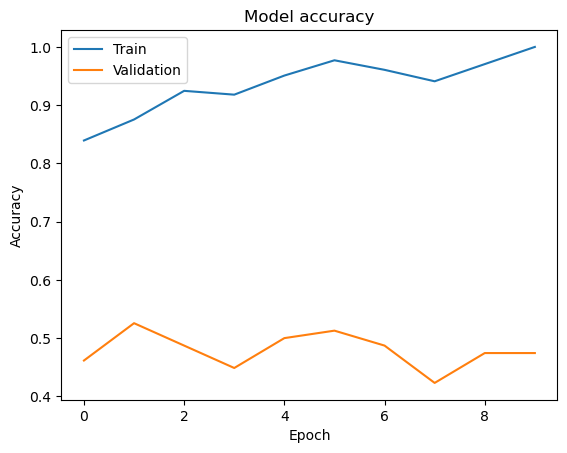

In [ ]:
import matplotlib.pyplot as plt

# Define your training and validation data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Training data generator
val_datagen = ImageDataGenerator(rescale=1./255)    # Validation data generator

# Create generators for the training and validation datasets
train_generator = train_datagen.flow_from_directory(
    './training_dataset/Eye_diseases',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    './test_dataset/Eye_diseases',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Train your model using model.fit() method and store the history
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
